In [1]:
import pandas as pd

df = pd.read_csv("mapped_data.csv")

In [2]:
print(df["q6_num"].isnull().sum())

1


In [3]:
df = df.dropna(subset=["q6_num"])
print(df["q6_num"].isnull().sum()) 

0


In [4]:
print(df[["q4_01_num", "q4_02_num", "q4_03_num", "q4_04_num", "q4_05_num", "q4_06_num", "q5_num"]].isnull().sum())

q4_01_num     1
q4_02_num     2
q4_03_num     0
q4_04_num    10
q4_05_num     1
q4_06_num     3
q5_num        0
dtype: int64


In [5]:
for col in ["q4_01_num", "q4_02_num", "q4_03_num", "q4_04_num", "q4_05_num", "q4_06_num", "q5_num"]:
    most_frequent_value = df[col].mode()[0]
    df.loc[:, col] = df[col].fillna(most_frequent_value) 
    
print(df[["q4_01_num", "q4_02_num", "q4_03_num", "q4_04_num", "q4_05_num", "q4_06_num", "q5_num"]].isnull().sum())

q4_01_num    0
q4_02_num    0
q4_03_num    0
q4_04_num    0
q4_05_num    0
q4_06_num    0
q5_num       0
dtype: int64


In [6]:
LIKERT_COLS = [
    "q4_01_num", "q4_02_num", "q4_03_num", "q4_05_num",
    "q5_num", "q6_num"
]

def simple_stats(col):
    return pd.Series({
        "N"    : col.count(),
        "Mean" : col.mean().round(2),
        "SD"   : col.std(ddof=1).round(2),
        "Min"  : col.min(),
        "Max"  : col.max()
    })

likert_stats = df[LIKERT_COLS].apply(simple_stats).round(2)

likert_freq = (
    df[LIKERT_COLS]
      .apply(lambda s: s.value_counts(dropna=False).sort_index())
      .T
      .fillna(0)
      .astype(int)
)
likert_freq.columns = [f"n_{i}" for i in likert_freq.columns]   # n_1, n_2, n_3, n_4

missing = df[LIKERT_COLS].isna().sum()
print("Missing values:\n", missing)
print(likert_stats)

Missing values:
 q4_01_num    0
q4_02_num    0
q4_03_num    0
q4_05_num    0
q5_num       0
q6_num       0
dtype: int64
      q4_01_num  q4_02_num  q4_03_num  q4_05_num  q5_num  q6_num
N        935.00     935.00     935.00     935.00  935.00  935.00
Mean       3.16       3.09       2.87       2.58    3.63    2.67
SD         0.75       0.87       0.86       0.95    0.75    0.97
Min        1.00       1.00       1.00       1.00    1.00    1.00
Max        4.00       4.00       4.00       4.00    4.00    4.00


In [7]:
cols = ["q4_01_num", "q4_02_num", "q4_03_num", "q4_05_num", "q5_num", "q6_num"]

for col in cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False).sort_index())


--- q4_01_num ---
q4_01_num
1.0     24
2.0    129
3.0    456
4.0    326
Name: count, dtype: int64

--- q4_02_num ---
q4_02_num
1.0     68
2.0    113
3.0    418
4.0    336
Name: count, dtype: int64

--- q4_03_num ---
q4_03_num
1     65
2    225
3    416
4    229
Name: count, dtype: int64

--- q4_05_num ---
q4_05_num
1.0    137
2.0    290
3.0    334
4.0    174
Name: count, dtype: int64

--- q5_num ---
q5_num
1     16
2    103
3     88
4    728
Name: count, dtype: int64

--- q6_num ---
q6_num
1.0    116
2.0    295
3.0    302
4.0    222
Name: count, dtype: int64


Total number of respondents: 935


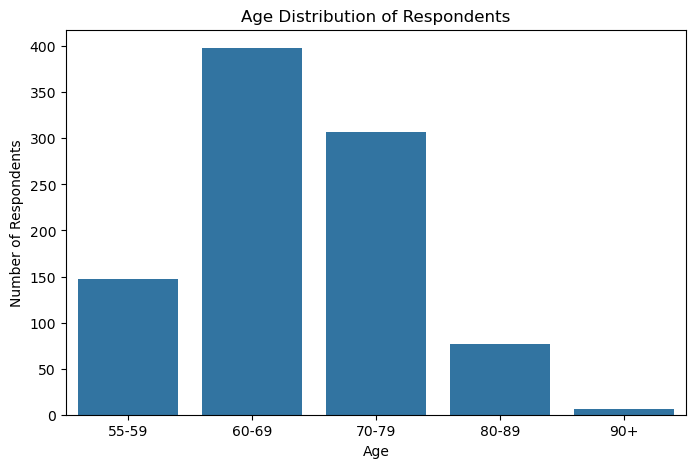

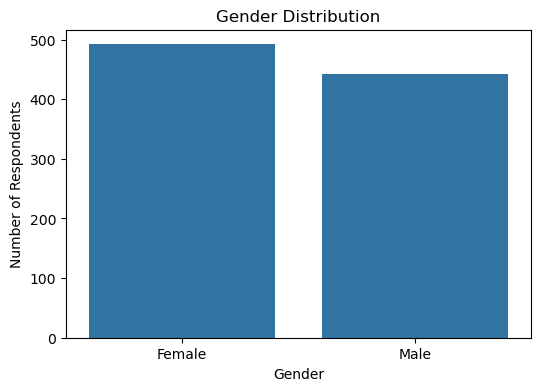

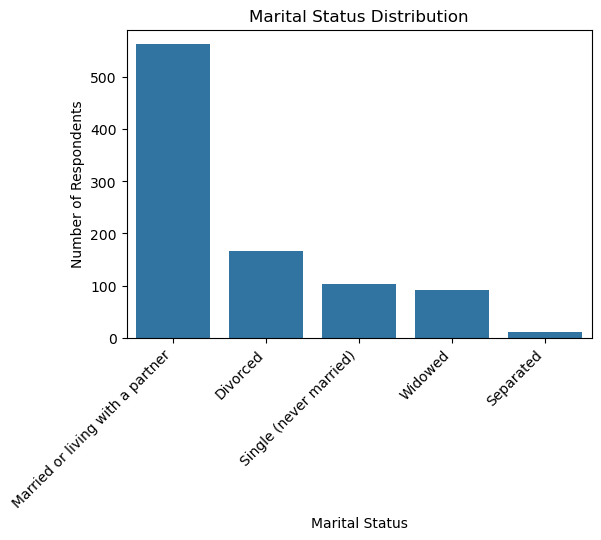

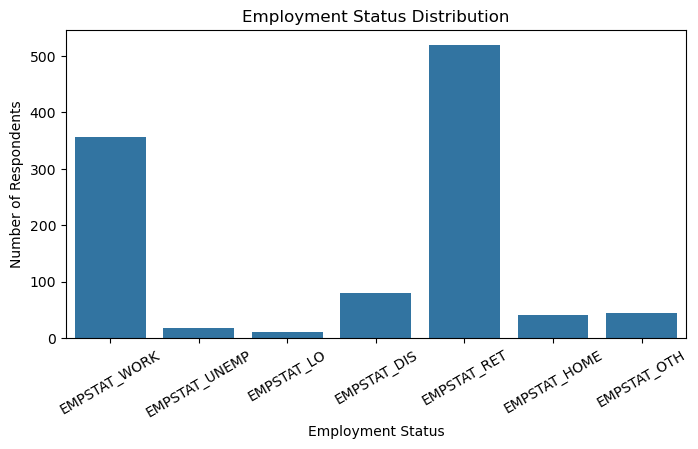

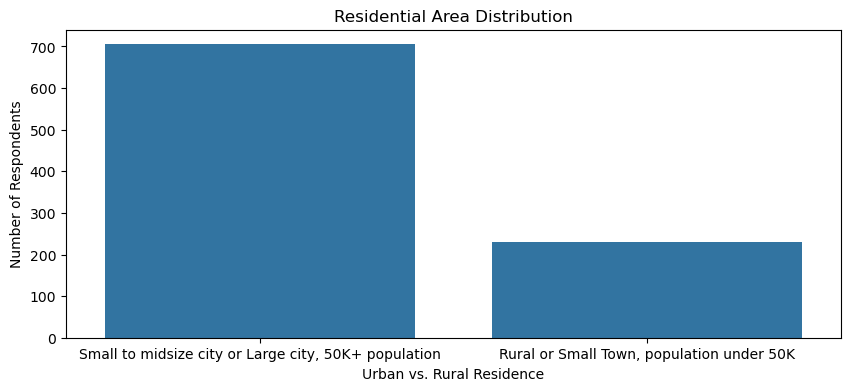

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

print(f"Total number of respondents: {df.shape[0]}")

age_column = "AGE"
df[age_column] = df[age_column].astype(str)
df[age_column] = df[age_column].replace("Age 90 or older", "90")
df[age_column] = df[age_column].astype(int)

def categorize_age(age):
    if age >= 90:
        return "90+"
    elif age >= 80:
        return "80-89"
    elif age >= 70:
        return "70-79"
    elif age >= 60:
        return "60-69"
    else:
        return "55-59"

df["AGE_GROUP"] = df[age_column].apply(categorize_age)
age_group_counts = df["AGE_GROUP"].value_counts().sort_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.xlabel("Age")
plt.ylabel("Number of Respondents")
plt.title("Age Distribution of Respondents")
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x=df["SEX"].value_counts().index, y=df["SEX"].value_counts().values)
plt.xlabel("Gender")
plt.ylabel("Number of Respondents")
plt.title("Gender Distribution")
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x=df["MARIT"].value_counts().index, y=df["MARIT"].value_counts().values)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Marital Status")
plt.ylabel("Number of Respondents")
plt.title("Marital Status Distribution")
plt.show()

empstat_columns = ["EMPSTAT_WORK", "EMPSTAT_UNEMP", "EMPSTAT_LO", "EMPSTAT_DIS", "EMPSTAT_RET", "EMPSTAT_HOME", "EMPSTAT_OTH"]
empstat_counts = df[empstat_columns].apply(lambda x: (x != 'No').sum()) 

plt.figure(figsize=(8, 4))
sns.barplot(x=empstat_counts.index, y=empstat_counts.values)
plt.xlabel("Employment Status")
plt.ylabel("Number of Respondents")
plt.title("Employment Status Distribution")
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(10, 4))
sns.barplot(x=df["URBAN_RURAL"].value_counts().index, y=df["URBAN_RURAL"].value_counts().values)
plt.xlabel("Urban vs. Rural Residence")
plt.ylabel("Number of Respondents")
plt.title("Residential Area Distribution")
plt.show()

In [9]:
df['AGE_GROUP'].value_counts()

AGE_GROUP
60-69    398
70-79    307
55-59    147
80-89     77
90+        6
Name: count, dtype: int64

In [10]:
df["SEX"].value_counts(normalize=True).round(3) * 100
df["URBAN_RURAL"].value_counts(normalize=True).round(3) * 100

df["AGE"].describe()

mean_age = df["AGE"].mean()
std_age = df["AGE"].std()
min_age = df["AGE"].min()
max_age = df["AGE"].max()
age_group_counts = (
    df["AGE_GROUP"]
    .value_counts()
    .sort_index()
    .to_frame("n")
    .assign(pct=lambda x: (x["n"] / x["n"].sum() * 100).round(1))
)

gender_counts = (
    df["SEX"]
    .value_counts()
    .sort_index()
    .to_frame("n")
    .assign(pct=lambda x: (x["n"] / x["n"].sum() * 100).round(1))
)

residence_counts = (
    df["URBAN_RURAL"]
    .value_counts()
    .sort_index()
    .to_frame("n")
    .assign(pct=lambda x: (x["n"] / x["n"].sum() * 100).round(1))
)

from IPython.display import display

print("▼ Gender Distribution")
display(gender_counts)

print("\n▼ Residence Distribution")
display(residence_counts)

print("\n▼ Age Group Distribution")
display(age_group_counts)

▼ Gender Distribution


,n,pct
SEX,,
Female,492,52.6
Male,443,47.4



▼ Residence Distribution


,n,pct
URBAN_RURAL,,
"Rural or Small Town, population under 50K",230,24.6
"Small to midsize city or Large city, 50K+ population",705,75.4



▼ Age Group Distribution


,n,pct
AGE_GROUP,,
55-59,147,15.7
60-69,398,42.6
70-79,307,32.8
80-89,77,8.2
90+,6,0.6


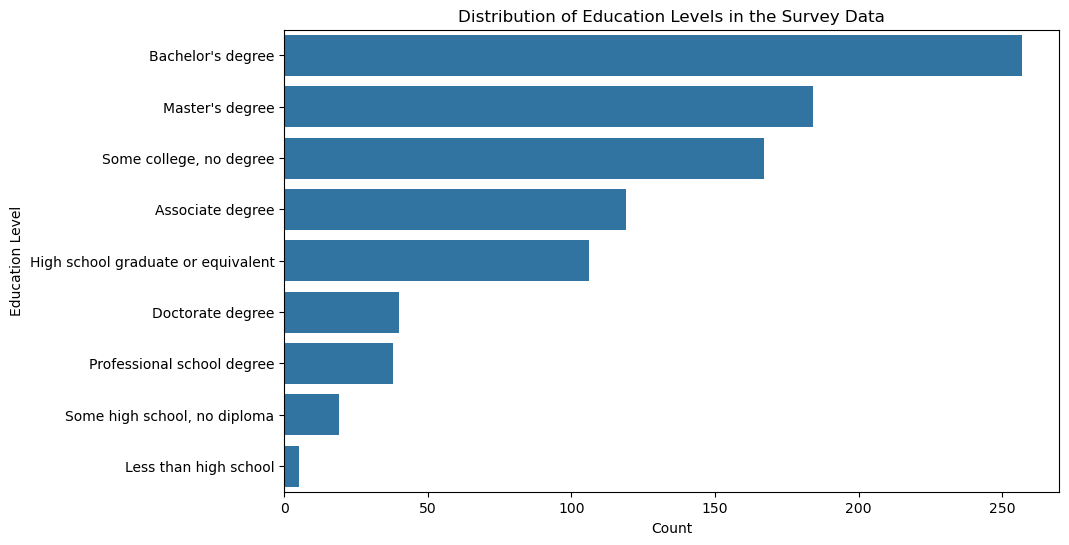

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['EDUC'], order=df['EDUC'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.title("Distribution of Education Levels in the Survey Data")
plt.show()

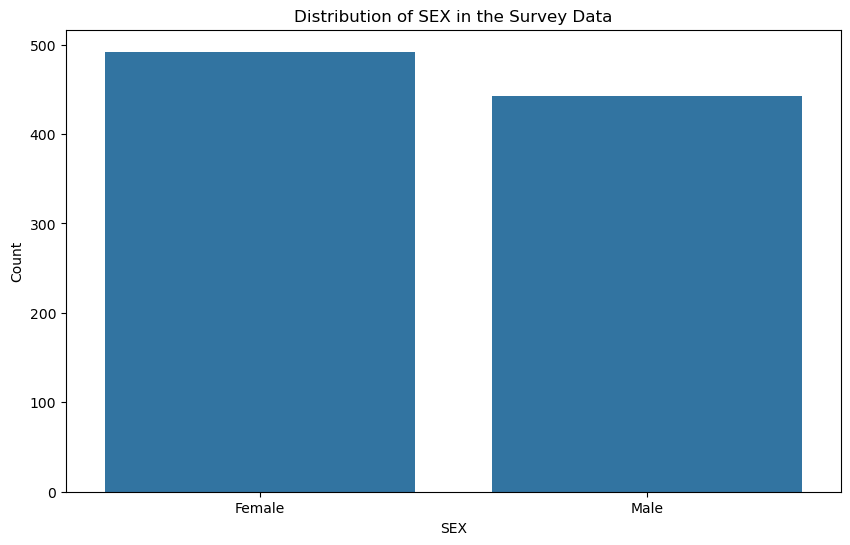

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['SEX'], order=df['SEX'].value_counts().index)
plt.xlabel("SEX")
plt.ylabel("Count")
plt.title("Distribution of SEX in the Survey Data")
plt.show()

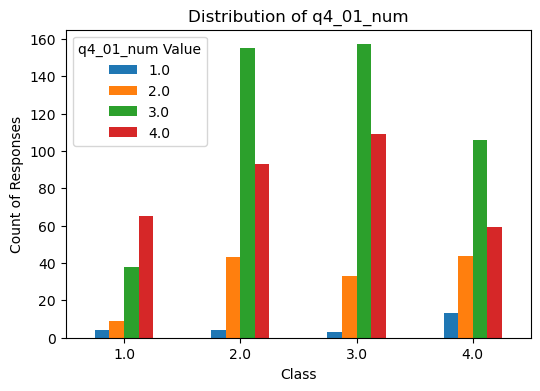


=== q4_01_num ===
【Counts】
q4_01_num  1.0  2.0  3.0  4.0
q6_num                       
1.0          4    9   38   65
2.0          4   43  155   93
3.0          3   33  157  109
4.0         13   44  106   59

【Percentages】
q4_01_num       1.0        2.0        3.0        4.0
q6_num                                              
1.0        3.448276   7.758621  32.758621  56.034483
2.0        1.355932  14.576271  52.542373  31.525424
3.0        0.993377  10.927152  51.986755  36.092715
4.0        5.855856  19.819820  47.747748  26.576577
--------------------------------------------------


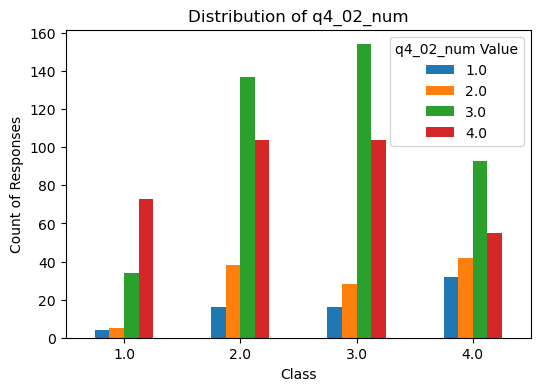


=== q4_02_num ===
【Counts】
q4_02_num  1.0  2.0  3.0  4.0
q6_num                       
1.0          4    5   34   73
2.0         16   38  137  104
3.0         16   28  154  104
4.0         32   42   93   55

【Percentages】
q4_02_num        1.0        2.0        3.0        4.0
q6_num                                               
1.0         3.448276   4.310345  29.310345  62.931034
2.0         5.423729  12.881356  46.440678  35.254237
3.0         5.298013   9.271523  50.993377  34.437086
4.0        14.414414  18.918919  41.891892  24.774775
--------------------------------------------------


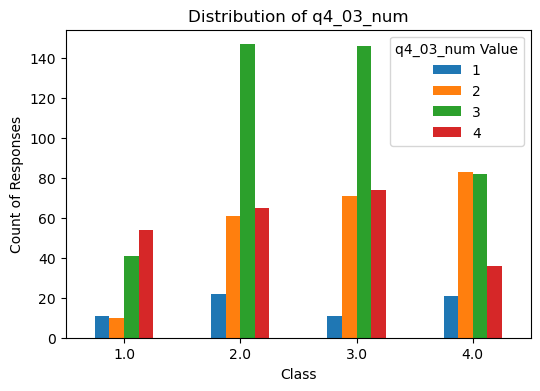


=== q4_03_num ===
【Counts】
q4_03_num   1   2    3   4
q6_num                    
1.0        11  10   41  54
2.0        22  61  147  65
3.0        11  71  146  74
4.0        21  83   82  36

【Percentages】
q4_03_num         1          2          3          4
q6_num                                              
1.0        9.482759   8.620690  35.344828  46.551724
2.0        7.457627  20.677966  49.830508  22.033898
3.0        3.642384  23.509934  48.344371  24.503311
4.0        9.459459  37.387387  36.936937  16.216216
--------------------------------------------------


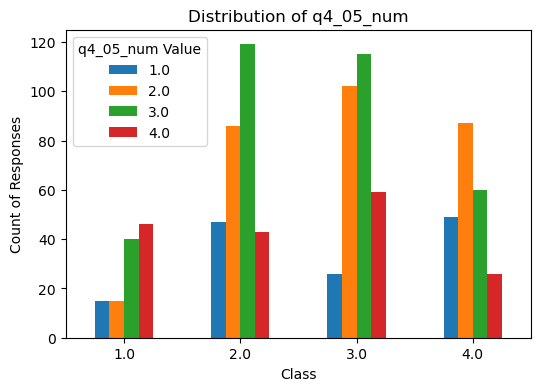


=== q4_05_num ===
【Counts】
q4_05_num  1.0  2.0  3.0  4.0
q6_num                       
1.0         15   15   40   46
2.0         47   86  119   43
3.0         26  102  115   59
4.0         49   87   60   26

【Percentages】
q4_05_num        1.0        2.0        3.0        4.0
q6_num                                               
1.0        12.931034  12.931034  34.482759  39.655172
2.0        15.932203  29.152542  40.338983  14.576271
3.0         8.609272  33.774834  38.079470  19.536424
4.0        22.072072  39.189189  27.027027  11.711712
--------------------------------------------------


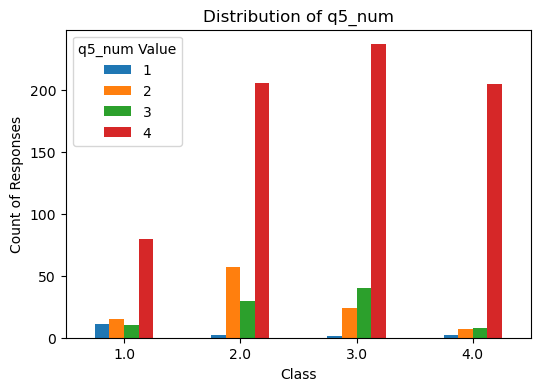


=== q5_num ===
【Counts】
q5_num   1   2   3    4
q6_num                 
1.0     11  15  10   80
2.0      2  57  30  206
3.0      1  24  40  237
4.0      2   7   8  205

【Percentages】
q5_num         1          2          3          4
q6_num                                           
1.0     9.482759  12.931034   8.620690  68.965517
2.0     0.677966  19.322034  10.169492  69.830508
3.0     0.331126   7.947020  13.245033  78.476821
4.0     0.900901   3.153153   3.603604  92.342342
--------------------------------------------------

=== Descriptive Statistics for Each Feature by Class ===
       q4_01_num                                              q4_02_num  \
           count      mean       std  min  25%  50%  75%  max     count   
q6_num                                                                    
1.0        116.0  3.413793  0.780958  1.0  3.0  4.0  4.0  4.0     116.0   
2.0        295.0  3.142373  0.704747  1.0  3.0  3.0  4.0  4.0     295.0   
3.0        302.0  3.231788  0.67

In [13]:
import matplotlib.pyplot as plt

selected_features = ["q4_01_num", "q4_02_num", "q4_03_num", "q4_05_num", "q5_num"]

for feature in selected_features:
    counts = pd.crosstab(df["q6_num"], df[feature])
    
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100
    
    ax = counts.plot(kind="bar", stacked=False, figsize=(6, 4))
    plt.title(f"Distribution of {feature}")
    plt.xlabel("Class")
    plt.ylabel("Count of Responses")
    plt.legend(title=f"{feature} Value", loc="best")
    plt.xticks(rotation=0) 
    plt.show()
    
    print(f"\n=== {feature} ===")
    print("【Counts】")
    print(counts)
    print("\n【Percentages】")
    print(percentages)
    print("-"*50)

print("\n=== Descriptive Statistics for Each Feature by Class ===")
group_stats = df.groupby("q6_num")[selected_features].describe()
print(group_stats)

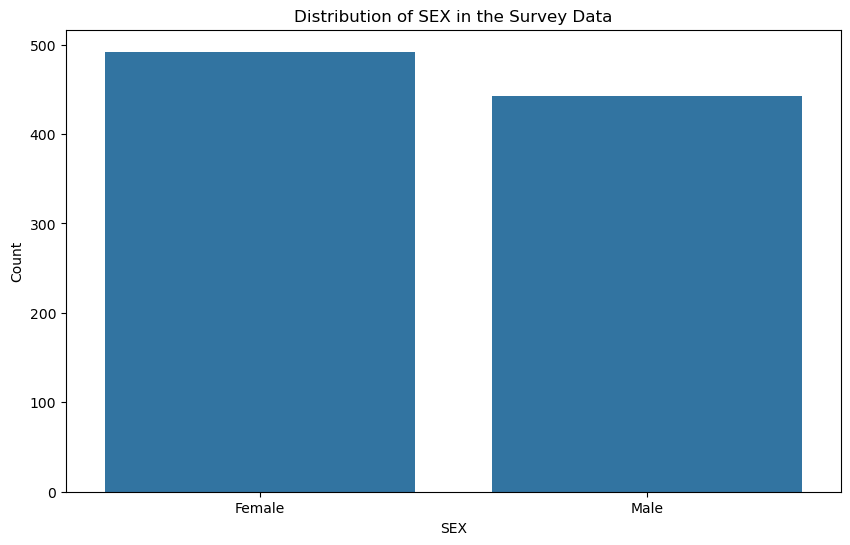

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['SEX'], order=df['SEX'].value_counts().index)
plt.xlabel("SEX")
plt.ylabel("Count")
plt.title("Distribution of SEX in the Survey Data")
plt.show()

In [15]:
import numpy as np
from scipy import stats

stats.kstest(df['q6_num'], stats.norm.cdf)

KstestResult(statistic=0.8531856969288262, pvalue=0.0, statistic_location=2.0, statistic_sign=-1)

statistic=0.8531856969288262, pvalue=0.0
We can reject the null hypothesis.

ML

Find best params

Best parems
print(grid_search.best_params_)
{
'bootstrap': True,
'max_depth': None, 
'max_features': 'sqrt',
'min_samples_leaf': 8,
'min_samples_split': 20,
'n_estimators': 50
}

4-class

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

selected_questions = ["q4_01_num", "q4_02_num", "q4_03_num", "q4_05_num", "q5_num"]

X = df[selected_questions]
y = df["q6_num"] 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42
)

best_params = {
    'bootstrap': True,
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 8,
    'min_samples_split': 20,
    'n_estimators': 50
}

best_rf = RandomForestClassifier(
    **best_params,
    random_state=42
)
best_rf.fit(X_train, y_train)

def get_top_n_predictions(model, X, top_n=2):
    probs = model.predict_proba(X)
    top_n_idx = np.argsort(probs, axis=1)[:, :-top_n-1:-1]
    top_n_classes = model.classes_[top_n_idx]
    top_n_probs   = np.take_along_axis(probs, top_n_idx, axis=1)
    
    df_results = pd.DataFrame()
    for i in range(top_n):
        df_results[f"Top_{i+1}_Class"] = top_n_classes[:, i]
        df_results[f"Top_{i+1}_Probability"] = top_n_probs[:, i]
    return df_results

def create_top2_confusion_matrix(y_true, df_results, labels=None):
    y_pred_adjusted = []
    
    for true, top1, top2 in zip(y_true, 
                                df_results["Top_1_Class"], 
                                df_results["Top_2_Class"]):
        if true in (top1, top2):
            y_pred_adjusted.append(true) 
        else:
            y_pred_adjusted.append(top1) 
    
    cm = confusion_matrix(y_true, y_pred_adjusted, labels=labels)
    return cm, y_pred_adjusted

df_train_results = get_top_n_predictions(best_rf, X_train, top_n=2)
df_test_results = get_top_n_predictions(best_rf, X_test, top_n=2)

print("=== In-Sample (Train) Results ===")
print(df_train_results.head())

print("\n=== Out-of-Sample (Test) Results ===")
print(df_test_results.head())

=== In-Sample (Train) Results ===
   Top_1_Class  Top_1_Probability  Top_2_Class  Top_2_Probability
0          2.0           0.445111          3.0           0.280871
1          1.0           0.444435          3.0           0.391029
2          3.0           0.405579          4.0           0.275903
3          3.0           0.342485          4.0           0.334490
4          3.0           0.347734          1.0           0.281260

=== Out-of-Sample (Test) Results ===
   Top_1_Class  Top_1_Probability  Top_2_Class  Top_2_Probability
0          3.0           0.405579          4.0           0.275903
1          4.0           0.482041          3.0           0.281830
2          3.0           0.384584          1.0           0.338867
3          3.0           0.412342          4.0           0.314412
4          3.0           0.419237          2.0           0.355456


In [17]:
y_pred_top1_train = df_train_results["Top_1_Class"]
y_pred_top1_test = df_test_results["Top_1_Class"]

acc_top1_train = accuracy_score(y_train, y_pred_top1_train)
cm_top1_train = confusion_matrix(y_train, y_pred_top1_train)
cr_top1_train = classification_report(y_train, y_pred_top1_train)

print("=== (1) Top1 vs True Labels (Train) ===")
print("Accuracy:", acc_top1_train)
print("Confusion Matrix:\n", cm_top1_train)
print("Classification Report:\n", cr_top1_train)

acc_top1_test = accuracy_score(y_test, y_pred_top1_test)
cm_top1_test = confusion_matrix(y_test, y_pred_top1_test)
cr_top1_test = classification_report(y_test, y_pred_top1_test)

print("=== (1) Top1 vs True Labels (Test) ===")
print("Accuracy:", acc_top1_test)
print("Confusion Matrix:\n", cm_top1_test)
print("Classification Report:\n", cr_top1_test)

y_pred_top2_train = df_train_results["Top_2_Class"]
y_pred_top2_test = df_test_results["Top_2_Class"]

acc_top2_train = accuracy_score(y_train, y_pred_top2_train)
cm_top2_train = confusion_matrix(y_train, y_pred_top2_train)
cr_top2_train = classification_report(y_train, y_pred_top2_train)

print("=== (2) Top2 (Second Predicted) vs True Labels (Train) ===")
print("Accuracy:", acc_top2_train)
print("Confusion Matrix:\n", cm_top2_train)
print("Classification Report:\n", cr_top2_train)

acc_top2_test = accuracy_score(y_test, y_pred_top2_test)
cm_top2_test = confusion_matrix(y_test, y_pred_top2_test)
cr_top2_test = classification_report(y_test, y_pred_top2_test)

print("=== (2) Top2 (Second Predicted) vs True Labels (Test) ===")
print("Accuracy:", acc_top2_test)
print("Confusion Matrix:\n", cm_top2_test)
print("Classification Report:\n", cr_top2_test)

correct_top2_train = []
for true_label, top1, top2 in zip(y_train, 
                                  df_train_results["Top_1_Class"], 
                                  df_train_results["Top_2_Class"]):
    if true_label in (top1, top2):
        correct_top2_train.append(1)
    else:
        correct_top2_train.append(0)
top2_accuracy_train = np.mean(correct_top2_train)

print("=== (3) Top2 Hit Rate (Train) ===")
print("Top2 Accuracy (Hit Rate):", top2_accuracy_train)

correct_top2_test = []
for true_label, top1, top2 in zip(y_test, 
                                  df_test_results["Top_1_Class"], 
                                  df_test_results["Top_2_Class"]):
    if true_label in (top1, top2):
        correct_top2_test.append(1)
    else:
        correct_top2_test.append(0)
top2_accuracy_test = np.mean(correct_top2_test)

print("=== (3) Top2 Hit Rate (Test) ===")
print("Top2 Accuracy (Hit Rate):", top2_accuracy_test)

all_labels = sorted(y.unique()) 

cm_top2_train_adj, y_pred_top2_train_adj = create_top2_confusion_matrix(
    y_train, df_train_results, labels=all_labels
)
print("=== (4) Top-2 Confusion Matrix (Train) ===")
print(cm_top2_train_adj)
print("Classification Report (Train):\n", classification_report(y_train, y_pred_top2_train_adj))

cm_top2_test_adj, y_pred_top2_test_adj = create_top2_confusion_matrix(
    y_test, df_test_results, labels=all_labels
)
print("=== (4) Top-2 Confusion Matrix (Test) ===")
print(cm_top2_test_adj)
print("Classification Report (Test):\n", classification_report(y_test, y_pred_top2_test_adj))

=== (1) Top1 vs True Labels (Train) ===
Accuracy: 0.4679144385026738
Confusion Matrix:
 [[  8  27  49   6]
 [  1  83 112  30]
 [  5  36 173  37]
 [  0  21  74  86]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.57      0.09      0.15        90
         2.0       0.50      0.37      0.42       226
         3.0       0.42      0.69      0.53       251
         4.0       0.54      0.48      0.51       181

    accuracy                           0.47       748
   macro avg       0.51      0.41      0.40       748
weighted avg       0.49      0.47      0.44       748

=== (1) Top1 vs True Labels (Test) ===
Accuracy: 0.42245989304812837
Confusion Matrix:
 [[ 4  3 15  4]
 [ 0 27 31 11]
 [ 2  4 33 12]
 [ 1  3 22 15]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.57      0.15      0.24        26
         2.0       0.73      0.39      0.51        69
         3.0       0.33      0.65      0

Balanced

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

selected_questions = ["q4_01_num", "q4_02_num", "q4_03_num", "q4_05_num", "q5_num"]

X = df[selected_questions]
y = df["q6_num"] 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42,
    stratify=y
)

best_params = {
    'bootstrap': True,
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 8,
    'min_samples_split': 20,
    'n_estimators': 50
}

best_rf = RandomForestClassifier(
    **best_params,
    class_weight='balanced',
    random_state=42
)
best_rf.fit(X_train, y_train)

def get_top_n_predictions(model, X, top_n=2):
    probs = model.predict_proba(X)
    top_n_idx = np.argsort(probs, axis=1)[:, :-top_n-1:-1]
    top_n_classes = model.classes_[top_n_idx]
    top_n_probs   = np.take_along_axis(probs, top_n_idx, axis=1)
    
    df_results = pd.DataFrame()
    for i in range(top_n):
        df_results[f"Top_{i+1}_Class"] = top_n_classes[:, i]
        df_results[f"Top_{i+1}_Probability"] = top_n_probs[:, i]
    return df_results

def create_top2_confusion_matrix(y_true, df_results, labels=None):
    y_pred_adjusted = []
    
    for true, top1, top2 in zip(y_true, 
                                df_results["Top_1_Class"], 
                                df_results["Top_2_Class"]):
        if true in (top1, top2):
            y_pred_adjusted.append(true) 
        else:
            y_pred_adjusted.append(top1) 
    
    cm = confusion_matrix(y_true, y_pred_adjusted, labels=labels)
    return cm, y_pred_adjusted

df_train_results = get_top_n_predictions(best_rf, X_train, top_n=2)
df_test_results = get_top_n_predictions(best_rf, X_test, top_n=2)

print("=== In-Sample (Train) Results ===")
print(df_train_results.head())

print("\n=== Out-of-Sample (Test) Results ===")
print(df_test_results.head())

=== In-Sample (Train) Results ===
   Top_1_Class  Top_1_Probability  Top_2_Class  Top_2_Probability
0          2.0           0.432788          1.0           0.319060
1          3.0           0.305933          2.0           0.244358
2          4.0           0.357850          2.0           0.285463
3          3.0           0.305933          2.0           0.244358
4          1.0           0.452278          3.0           0.224998

=== Out-of-Sample (Test) Results ===
   Top_1_Class  Top_1_Probability  Top_2_Class  Top_2_Probability
0          4.0           0.463349          3.0           0.289835
1          2.0           0.508619          1.0           0.226362
2          2.0           0.310047          3.0           0.299375
3          4.0           0.597390          3.0           0.202398
4          4.0           0.610470          3.0           0.175532


In [19]:
y_pred_top1_train = df_train_results["Top_1_Class"]
y_pred_top1_test = df_test_results["Top_1_Class"]

acc_top1_train = accuracy_score(y_train, y_pred_top1_train)
cm_top1_train = confusion_matrix(y_train, y_pred_top1_train)
cr_top1_train = classification_report(y_train, y_pred_top1_train)

print("=== (1) Top1 vs True Labels (Train) ===")
print("Accuracy:", acc_top1_train)
print("Confusion Matrix:\n", cm_top1_train)
print("Classification Report:\n", cr_top1_train)

acc_top1_test = accuracy_score(y_test, y_pred_top1_test)
cm_top1_test = confusion_matrix(y_test, y_pred_top1_test)
cr_top1_test = classification_report(y_test, y_pred_top1_test)

print("=== (1) Top1 vs True Labels (Test) ===")
print("Accuracy:", acc_top1_test)
print("Confusion Matrix:\n", cm_top1_test)
print("Classification Report:\n", cr_top1_test)

y_pred_top2_train = df_train_results["Top_2_Class"]
y_pred_top2_test = df_test_results["Top_2_Class"]

acc_top2_train = accuracy_score(y_train, y_pred_top2_train)
cm_top2_train = confusion_matrix(y_train, y_pred_top2_train)
cr_top2_train = classification_report(y_train, y_pred_top2_train)

print("=== (2) Top2 (Second Predicted) vs True Labels (Train) ===")
print("Accuracy:", acc_top2_train)
print("Confusion Matrix:\n", cm_top2_train)
print("Classification Report:\n", cr_top2_train)

acc_top2_test = accuracy_score(y_test, y_pred_top2_test)
cm_top2_test = confusion_matrix(y_test, y_pred_top2_test)
cr_top2_test = classification_report(y_test, y_pred_top2_test)

print("=== (2) Top2 (Second Predicted) vs True Labels (Test) ===")
print("Accuracy:", acc_top2_test)
print("Confusion Matrix:\n", cm_top2_test)
print("Classification Report:\n", cr_top2_test)

correct_top2_train = []
for true_label, top1, top2 in zip(y_train, 
                                  df_train_results["Top_1_Class"], 
                                  df_train_results["Top_2_Class"]):
    if true_label in (top1, top2):
        correct_top2_train.append(1)
    else:
        correct_top2_train.append(0)
top2_accuracy_train = np.mean(correct_top2_train)

print("=== (3) Top2 Hit Rate (Train) ===")
print("Top2 Accuracy (Hit Rate):", top2_accuracy_train)

correct_top2_test = []
for true_label, top1, top2 in zip(y_test, 
                                  df_test_results["Top_1_Class"], 
                                  df_test_results["Top_2_Class"]):
    if true_label in (top1, top2):
        correct_top2_test.append(1)
    else:
        correct_top2_test.append(0)
top2_accuracy_test = np.mean(correct_top2_test)

print("=== (3) Top2 Hit Rate (Test) ===")
print("Top2 Accuracy (Hit Rate):", top2_accuracy_test)

all_labels = sorted(y.unique()) 

cm_top2_train_adj, y_pred_top2_train_adj = create_top2_confusion_matrix(
    y_train, df_train_results, labels=all_labels
)
print("=== (4) Top-2 Confusion Matrix (Train) ===")
print(cm_top2_train_adj)
print("Classification Report (Train):\n", classification_report(y_train, y_pred_top2_train_adj))

cm_top2_test_adj, y_pred_top2_test_adj = create_top2_confusion_matrix(
    y_test, df_test_results, labels=all_labels
)
print("=== (4) Top-2 Confusion Matrix (Test) ===")
print(cm_top2_test_adj)
print("Classification Report (Test):\n", classification_report(y_test, y_pred_top2_test_adj))

=== (1) Top1 vs True Labels (Train) ===
Accuracy: 0.4385026737967914
Confusion Matrix:
 [[48 18 16 11]
 [40 91 60 45]
 [58 33 97 53]
 [28 20 38 92]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.28      0.52      0.36        93
         2.0       0.56      0.39      0.46       236
         3.0       0.46      0.40      0.43       241
         4.0       0.46      0.52      0.49       178

    accuracy                           0.44       748
   macro avg       0.44      0.46      0.43       748
weighted avg       0.47      0.44      0.44       748

=== (1) Top1 vs True Labels (Test) ===
Accuracy: 0.39572192513368987
Confusion Matrix:
 [[14  5  3  1]
 [16 18 16  9]
 [17 13 18 13]
 [ 6  8  6 24]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.26      0.61      0.37        23
         2.0       0.41      0.31      0.35        59
         3.0       0.42      0.30      0.35        61
  

Binary

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

selected_questions = ["q4_01_num", "q4_02_num", "q4_03_num", "q4_05_num", "q5_num"]
X = df[selected_questions]
y = (df["q6_num"] >= 2).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

best_params = {
    'bootstrap': True,
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 8,
    'min_samples_split': 20,
    'n_estimators': 50
}
best_rf = RandomForestClassifier(
    **best_params,
    random_state=42
)
best_rf.fit(X_train, y_train)

y_pred_train = best_rf.predict(X_train)
y_pred_test  = best_rf.predict(X_test)

print("=== In-Sample (Train) ===")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print("Classification Report:\n", classification_report(y_train, y_pred_train))

print("\n=== Out-of-Sample (Test) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))

=== In-Sample (Train) ===
Accuracy: 0.8796791443850267
Confusion Matrix:
 [[  0  90]
 [  0 658]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.88      1.00      0.94       658

    accuracy                           0.88       748
   macro avg       0.44      0.50      0.47       748
weighted avg       0.77      0.88      0.82       748


=== Out-of-Sample (Test) ===
Accuracy: 0.8609625668449198
Confusion Matrix:
 [[  0  26]
 [  0 161]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.86      1.00      0.93       161

    accuracy                           0.86       187
   macro avg       0.43      0.50      0.46       187
weighted avg       0.74      0.86      0.80       187



/opt/network/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/network/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/network/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/network/

Balanced

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

selected_questions = ["q4_01_num", "q4_02_num", "q4_03_num", "q4_05_num", "q5_num"]
X = df[selected_questions]
y = (df["q6_num"] >= 2).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_params = {
    'bootstrap': True,
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 8,
    'min_samples_split': 20,
    'n_estimators': 50
}
best_rf = RandomForestClassifier(
    **best_params,
    class_weight='balanced',
    random_state=42
)
best_rf.fit(X_train, y_train)

y_pred_train = best_rf.predict(X_train)
y_pred_test  = best_rf.predict(X_test)

print("=== In-Sample (Train) ===")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print("Classification Report:\n", classification_report(y_train, y_pred_train))

print("\n=== Out-of-Sample (Test) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))

=== In-Sample (Train) ===
Accuracy: 0.7232620320855615
Confusion Matrix:
 [[ 61  32]
 [175 480]]
Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.66      0.37        93
           1       0.94      0.73      0.82       655

    accuracy                           0.72       748
   macro avg       0.60      0.69      0.60       748
weighted avg       0.85      0.72      0.77       748


=== Out-of-Sample (Test) ===
Accuracy: 0.6684491978609626
Confusion Matrix:
 [[ 18   5]
 [ 57 107]]
Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.78      0.37        23
           1       0.96      0.65      0.78       164

    accuracy                           0.67       187
   macro avg       0.60      0.72      0.57       187
weighted avg       0.87      0.67      0.73       187

